In [1]:
import numpy as np
import pandas as pd
import math
from tabulate import tabulate
from matplotlib import pyplot as plt
from decimal import Decimal
from scipy import stats
import sys
import collections

# imput 1

In [2]:
#x=np.random.rand(10)
#y=np.random.rand(10)
x=np.array([1,2,3,4,5,6,7,8,9,10])
y=np.array([1.5,2.1,2.8,3.99,5.01,5.95,7.5,8.65,9.69,11])

In [3]:
data = np.array([x,y]).T #creo trasposta cos' da avere le colonne al posto delle righe
data

array([[ 1.  ,  1.5 ],
       [ 2.  ,  2.1 ],
       [ 3.  ,  2.8 ],
       [ 4.  ,  3.99],
       [ 5.  ,  5.01],
       [ 6.  ,  5.95],
       [ 7.  ,  7.5 ],
       [ 8.  ,  8.65],
       [ 9.  ,  9.69],
       [10.  , 11.  ]])

In [4]:
df=pd.DataFrame(data=data, columns = ['x','y'])

# imput 2

In [38]:
df = pd.read_csv('test.csv') #carico il csv
df = df.sort_values('x') #riordino in base al valore di x
x=df["x"]
y=df["y"]
data = np.array([x,y]).T #creo una matrice con i dati ordinati

In [39]:
df=pd.DataFrame(data=data, columns = ['x','y']) #nuovo database con dati 

# continua

nel database ci va una funzione che controlli se cisono valori in x in comune e se si fare una media di questi valori e così anche con y così da poter fare la regressione lineare

In [5]:
x=df["x"]
y=df["y"]

In [6]:
def checkIfDuplicates_1(listOfElems):
    ''' Check if given list contains any duplicates '''
    if len(listOfElems) == len(set(listOfElems)):
        return False
    else:
        return True

In [7]:
listOfElems = x
result = checkIfDuplicates_1(listOfElems)
if result:
    print('Yes, list contains duplicates')
    #Creo un array di sole x uniche##############
    x_reduced=[item for item, count in collections.Counter(x).items() if count > 1]
    #print(x_reduced)
    #Creo un array con la media dei valori di y in base alle x uguali#########
    y_reduced=[]
    for i in x_reduced:
        res = np.where(x==i)[0]
        #print(res)
        y_sum_red=int()
        for a in res:
            #print(a)
            #print(y[a])
            y_sum_red+=y[a]
            #print(y_sum_red)
        y_reduced=np.append(y_reduced,y_sum_red/res.size)
    #print(y_reduced)
    #Creo il nuovo database con soli valori unici######################################à
    data = np.array([x_reduced,y_reduced]).T #creo trasposta cos' da avere le colonne al posto delle righe
    df=pd.DataFrame(data=data, columns = ['x','y'])
else:
    print('No duplicates found in list')   

No duplicates found in list


# Linear regression

In [16]:
def Linear_least_squares(x=df["x"],y=df["y"],name="Test",alpha=0.05,print_report=None,plot=True,plot_f=True,color_data="blue",color_line="black",color_error="red",color_CI="green",color_PI="orange",figursize=(12, 8)):
    if print_report!=None:
        if print_report=="txt":
            sys.stdout = open(f"report_{name}.txt", "w")
        elif print_report=="pdf":
            print("pdf")
    else:
       print("\n") 
    
#####Number of sample
    number_data=y.count()
#####In str x
    x_=""
    for i in x:
        x_=x_+str(i)+"\n"
#####In str y
    y_=""
    for i in y:
        y_=y_+str(i)+"\n"

#####Avarage of x and y
    x_mean=np.mean(x)
    y_mean=np.mean(y)

#####SSxx
    SSxx=np.sum(pow(x-x_mean,2))
    #print(f"SSxx: {SSxx}")

#####SSxy
    SSxy=np.sum((x-x_mean)*(y-y_mean))

#####Slope
    slope=SSxy/SSxx

#####Intercept
    intercept=y_mean-x_mean*slope

#####new x################################
    x_new = np.arange(np.amin(x), np.amax(x)+1,(np.amax(x)+1-np.amin(x))/number_data)
    x_new_=""
    for i in x_new:
        x_new_+=str(i)+"\n"

#####Prediction of y (y pred)#############################################
    y_pred=x_new*slope+intercept
    y_preda=""
    for i in range(number_data):
        y_preda +=str(y_pred[i])+"\n"

#####Prediction of y(x_orig) (y pred_orig)#############################################
    y_pred_orig=x*slope+intercept
    y_preda_orig=""
    for i in range(number_data):
        y_preda_orig +=str(y_pred[i])+"\n"

#####SSres (RSS è la devianza residua (Residual Sum of Squares))####################################################################
    SSres=0
    for i in range(number_data):
        SSres+=pow(y[i]-y_pred_orig[i],2)
    
#####SStot(TSS è la devianza totale (Total Sum of Squares))##########################
    SStot=0
    for i in range(number_data):
        SStot+=pow(y[i]-y_mean,2)
        
#####SSexp(ESS è la devianza spiegata dal modello (Explained Sum of Squares))##########################
    SSexp=0
    for i in range(number_data):
        SSexp+=pow(y_pred_orig[i]-y_mean,2)
        
#####SE ##########################################################################
    SE=math.sqrt(SSres/(number_data-2))

#####t-score ######################################################################################
    d_f_=number_data-2
    #Studnt, n= number of sample (n-1 degrees of freedom), p<0.05 (confidenza 1-alpha -> 1-0.05= 0.95, dato che è a due code si raddoppia il valore di alpha = (0.05/2)), 2-tail
    #print (stats.t.ppf(1-0.025, n))
    t_two=stats.t.ppf(1-alpha/2, d_f_)
    #print(f"tα/2: {t_two}")
    #Studnt, n=999, p<0.05%, Single tail
    t_one=stats.t.ppf(1-alpha, d_f_)

#####Residual###################################################################################
    residual=""
    for i in range(number_data):
        residual +=str(y_pred_orig[i]-y[i])+"\n"
    
#####R^2 (coefficiente di determinazione R2=SSexp/SStot or R2=1-(SSres/SStot))##################################################################
    R2=SSexp/SStot
    R2_="SSexp/SStot="+str(SSexp/SStot)+"\n"+"1-(SSres/SStot)="+str(1-(SSres/SStot))
    
#####Confidence interval########################################################################
    CI_Y_upper=[]
    CI_Y_lower=[]
    for i in range(number_data):
        #UPPER
        CI_y_upper=y_pred[i]+t_two*SE*math.sqrt((1/number_data)+pow(x[i]-x_mean,2)/SSxx)
        CI_Y_upper=np.append(CI_Y_upper, CI_y_upper)
        #LOWER
        CI_y_lower=y_pred[i]-t_two*SE*math.sqrt((1/number_data)+pow(x[i]-x_mean,2)/SSxx)
        CI_Y_lower=np.append(CI_Y_lower, CI_y_lower)
    #In string
    CI_Y_upper_a=""
    CI_Y_lower_a=""
    for i in range(number_data):
        CI_Y_upper_a+=str(CI_Y_upper[i])+"\n"
        CI_Y_lower_a+=str(CI_Y_lower[i])+"\n"

#####Prediction interval###################################################################
    PI_Y_upper=[]
    PI_Y_lower=[]
    for i in range(number_data):
        #UPPER
        PI_y_upper=y_pred[i]+t_two*SE*math.sqrt(1+(1/number_data)+pow(x[i]-x_mean,2)/SSxx)
        PI_Y_upper=np.append(PI_Y_upper, PI_y_upper)
        #LOWER
        PI_y_lower=y_pred[i]-t_two*SE*math.sqrt(1+(1/number_data)+pow(x[i]-x_mean,2)/SSxx)
        PI_Y_lower=np.append(PI_Y_lower, PI_y_lower)
    #In string
    PI_Y_upper_a=""
    PI_Y_lower_a=""
    for i in range(number_data):
        PI_Y_upper_a+=str(PI_Y_upper[i])+"\n"
        PI_Y_lower_a+=str(PI_Y_lower[i])+"\n"

##########TABLE REPORT###############################################################################à

    headers=["Number of sample","X value","Y value"]
    table=[[number_data,x_, y_]]
    headers1=["Avarage of x", "Avarage of y","SSxx","SSxy","SSres","SStot","SSexp","R^2","SE","α","tα/2","tα"]
    table1=[[x_mean,y_mean,SSxx,SSxy,SSres,SStot,SSexp,R2_,SE,alpha,t_two,t_one]]
    headers2=["Slope","Intercept","Predicted Y for original X","Residual (Ypre-Y)","New value for X","Y predicted"]
    table2=[[slope,intercept,y_preda_orig,residual,x_new_,y_preda]]
    headers3=["Y upper confidence band with new x","Y lower confidence band with new x","Y upper prediction band with new x","Y lower prediction band with new x"]
    table3=[[CI_Y_upper_a,CI_Y_lower_a,PI_Y_upper_a,PI_Y_lower_a]]
    

    print(f"Print of data calculated of {name}:")
    print("\n")
    print(tabulate(table, headers))
    print("\n")
    print(tabulate(table1, headers1))
    print("\n")
    print(tabulate(table2, headers2))
    print("\n")
    print(tabulate(table3, headers3))
    print("\n")
    
    ###########################################
    #PLOT#
    if plot==True:
        fig, axs = plt.subplots(2, 2, figsize=figursize)
        #plot linea di regressione con dati
        plt.subplot(2,2,1)
        plt.scatter(x,y, label="data", color=color_data)
        plt.plot(x_new,y_pred,color=color_line, label="Linear least squares regression")
        plt.title("Plot of data with linear least squares regression")
        plt.legend()
        #regressione con banda di confidenza e di predizione
        plt.subplot(2,2,2)
        plt.plot(x_new,y_pred,color=color_line, label="Linear least squares regression")
        plt.plot(x_new,CI_Y_upper, color=color_CI)
        plt.plot(x_new,CI_Y_lower, color=color_CI)
        plt.fill_between(x_new,CI_Y_upper,CI_Y_lower, color=color_CI,alpha=0.3, label="Confident intervall")
        plt.title("Regression with confident intervall")
        plt.legend()
        plt.subplot(2,2,3)
        plt.plot(x_new,y_pred,color=color_line, label="Linear least squares regression")
        plt.plot(x_new,PI_Y_upper, color=color_PI)
        plt.plot(x_new,PI_Y_lower, color=color_PI)
        plt.fill_between(x_new,PI_Y_upper,PI_Y_lower, color=color_PI,alpha=0.3,label="Prediction intervall")
        plt.title("Regression with prediction intervall")
        plt.legend()
        #plt 4 -> Residual
        plt.subplot(2,2,4)
        plt.scatter(x,y_pred-y, label="Residual",color=color_error)
        plt.axhline(y=0,color=color_line)
        plt.title("Residual")
        plt.legend()
        plt.show()
    
    if plot_f==True:
        plt.figure(figsize=figursize)
        plt.plot(x_new,y_pred,color=color_line, label="Linear least squares regression")
        plt.plot(x_new,CI_Y_upper, color=color_CI)
        plt.plot(x_new,CI_Y_lower, color=color_CI)
        plt.fill_between(x_new,CI_Y_upper,CI_Y_lower, color=color_CI,alpha=0.3, label="Confident intervall")
        plt.plot(x_new,PI_Y_upper, color=color_PI)
        plt.plot(x_new,PI_Y_lower, color=color_PI)
        plt.fill_between(x_new,PI_Y_upper,PI_Y_lower, color=color_PI,alpha=0.3,label="Prediction intervall")
        plt.title("Linear least squares regression with confident and prediction intervall")
        plt.legend()
        plt.show()
        

        
    if print_report!=None:
        sys.stdout.close()



Print of data calculated of Test:


  Number of sample  X value    Y value
------------------  ---------  ---------
                10  1.0        1.5
                    2.0        2.1
                    3.0        2.8
                    4.0        3.99
                    5.0        5.01
                    6.0        5.95
                    7.0        7.5
                    8.0        8.65
                    9.0        9.69
                    10.0       11.0


  Avarage of x    Avarage of y    SSxx    SSxy     SSres    SStot    SSexp  R^2                                      SE     α    tα/2       tα
--------------  --------------  ------  ------  --------  -------  -------  ---------------------------------  --------  ----  ------  -------
           5.5           5.819    82.5  89.675  0.809682  98.2837   97.474  SSexp/SStot=0.9917617824051741     0.318136  0.05   2.306  1.85955
                                                                            1-(SSres/SStot)=0.9

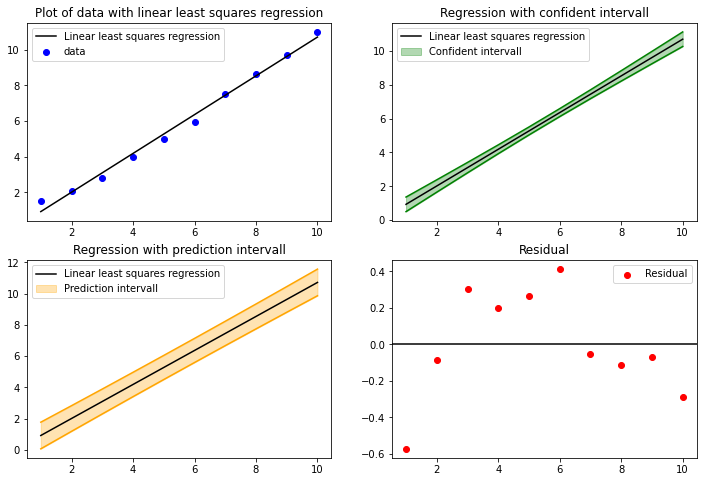

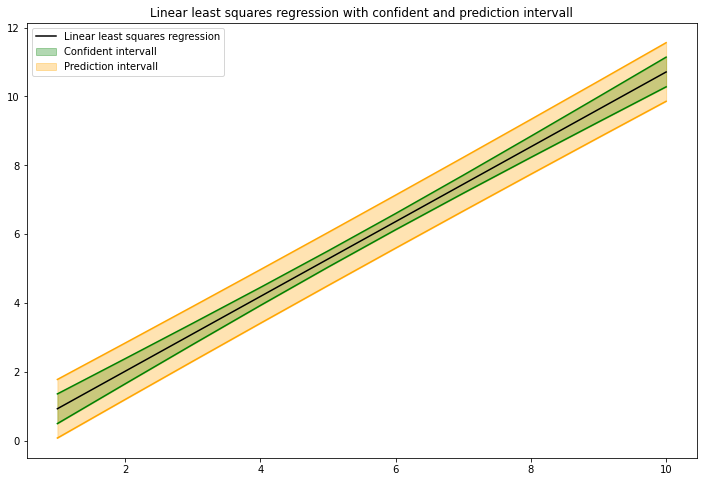

In [17]:
Linear_least_squares()